# 💻 Lab 2 - Intro to Probabilistic Programming (Part 2 - PyMC basics)

# ❗❗❗ Very important administrative detail

The lab changes its content once every **TWO WEEKS**.

*   week 1 & week 2 - lab1
*   **week 3 & week 4 - lab2**
*   ...

# Bayesian Methods for Hackers
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/tree/master

- Book with PyMC applications and discussions
- Jupyter notebooks for each chapter

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **PyMC** - Python library for Probabilistic Programing

Open -  https://www.pymc.io/welcome.html

In [2]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")


## "Hello, world!" in PyMC - Tossing a coin

We toss a coin and infer its bias. Let's consider the following basic bayesian model for a coin toss:

$p \sim Uniform(0, 1)$ - the **prior** distribution

$toss \sim Bernoulli(p)$ - the **likelihood** distribution





# Simulation vs. Inference

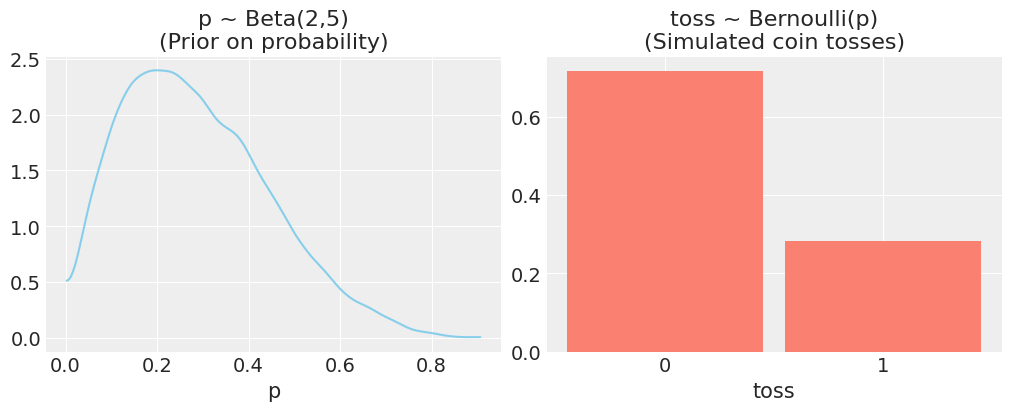

In [3]:
with pm.Model():
    p = pm.Beta('p', 2, 5)
    toss = pm.Bernoulli('toss', p=p)

draws = pm.draw([p, toss], draws=10000)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

az.plot_dist(draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('p ~ Beta(2,5)\n(Prior on probability)')
axes[0].set_xlabel('p')

az.plot_dist(draws[1], ax=axes[1], kind='hist', color='salmon')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated coin tosses)')
axes[1].set_xlabel('toss')

plt.show()

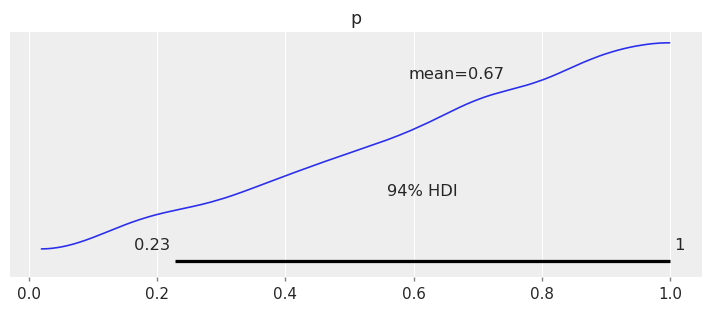

In [4]:
# The experiment of tossing a coin leads to Heads
toss_data = [1]

with pm.Model() as model_ex0:

    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # bayesian inference engine that samples from posterior
    # we will cover this in the next weeks
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

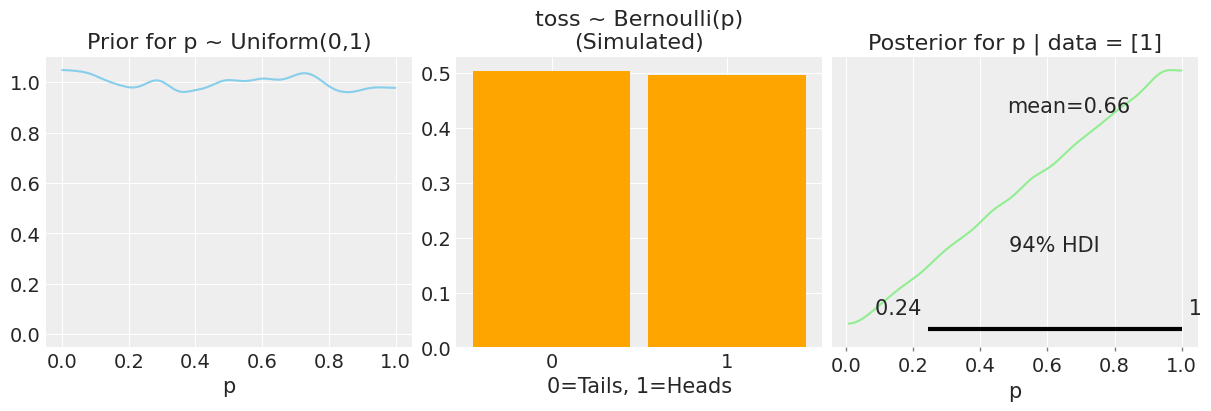

In [5]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


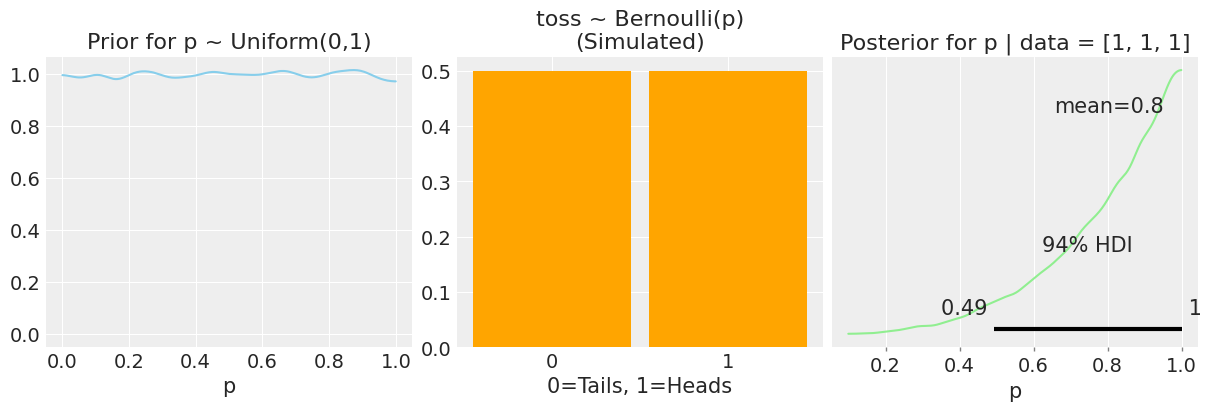

In [6]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Uniform('p', lower=0, upper=1)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Uniform(0,1)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


ERROR:pymc.stats.convergence:There were 13 divergences after tuning. Increase `target_accept` or reparameterize.


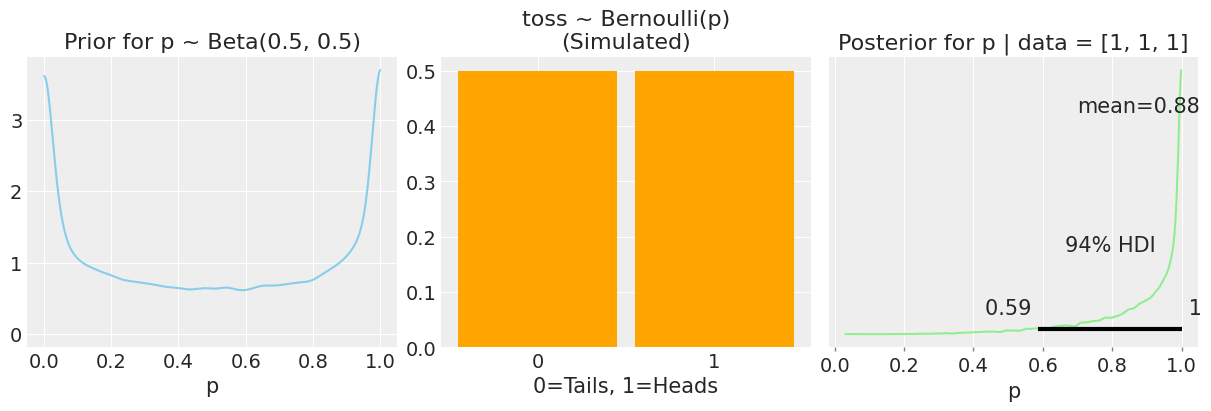

In [7]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Beta('p', alpha=0.5, beta=0.5)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(0.5, 0.5)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


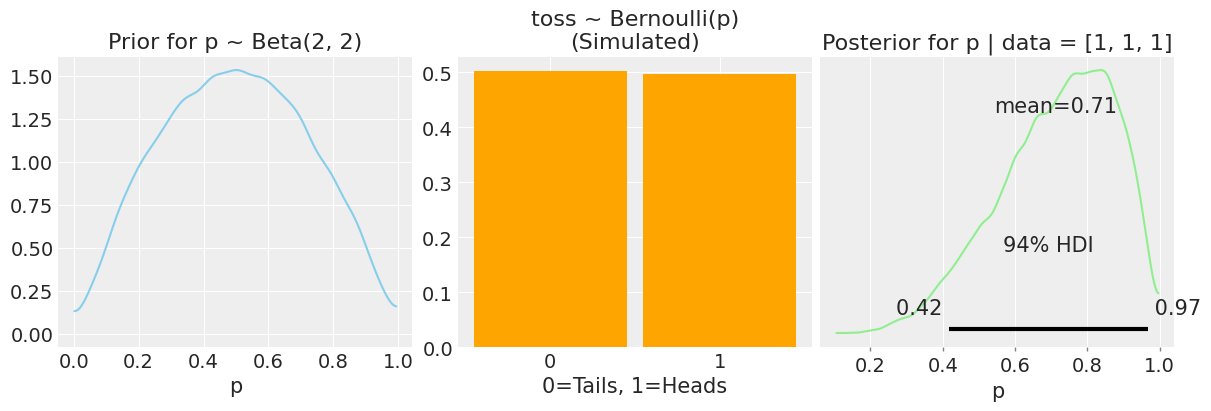

In [8]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

toss_data = [1, 1, 1]

with pm.Model() as model_ex0:
    # prior
    p = pm.Beta('p', alpha=2, beta=2)

    # likelihood
    toss = pm.Bernoulli('toss', p=p, observed=toss_data)

    # simulation
    prior_draws = pm.draw([p, toss], draws=20000)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

az.plot_dist(prior_draws[0], ax=axes[0], kind='kde', color='skyblue')
axes[0].set_title('Prior for p ~ Beta(2, 2)')
axes[0].set_xlabel('p')

az.plot_dist(prior_draws[1], ax=axes[1], kind='hist', color='orange')
axes[1].set_title('toss ~ Bernoulli(p)\n(Simulated)')
axes[1].set_xlabel('0=Tails, 1=Heads')

# bayesian inference engine - posterior sampling
with model_ex0:
    step = pm.NUTS()
    trace = pm.sample(20000, step=step, chains=1, progressbar=False)

az.plot_posterior(trace, var_names=['p'], ax=axes[2], color='lightgreen')
axes[2].set_title(f'Posterior for p | data = {str(toss_data)}', usetex=False)
axes[2].set_xlabel('p')

plt.show()


Let's use a sequence of throws. What is a proper likelihood distribution? We use a sequence of throws from a coin with true bias 0.25.

$p \sim Uniform(0, 1)$ - the **prior** distribution

$heads \sim Binomial(n, p)$ - the **likelihood** distribution

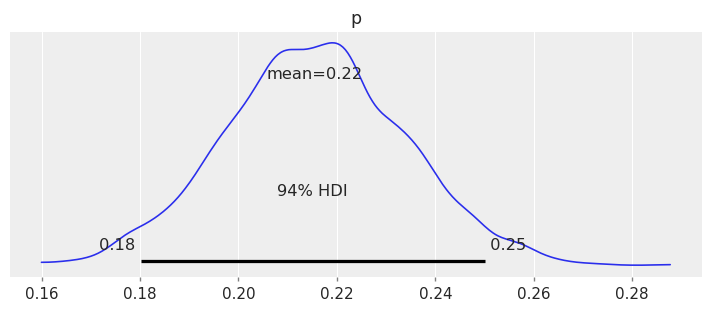

In [10]:
toss_data = np.random.binomial(n=1, p=0.25, size=[500])

with pm.Model() as model_ex1:

    #prior
    p = pm.Uniform('p', lower=0, upper=1)

    #likelihood
    heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

    # bayesian inference engine that samples from posterior
    step = pm.NUTS()
    trace = pm.sample(2000, step=step, chains=2, progressbar=False)

az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
plt.show()
plt.close()

Let's run the same model on an increasing number of coin tosses.

Run the following examples and monitor the posterior.

In [12]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

Coin bayesian model for 2 tosses


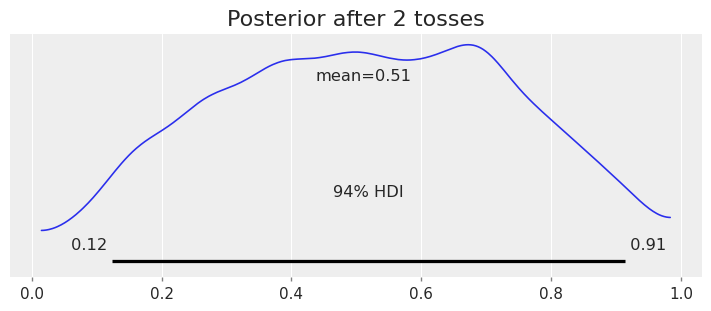

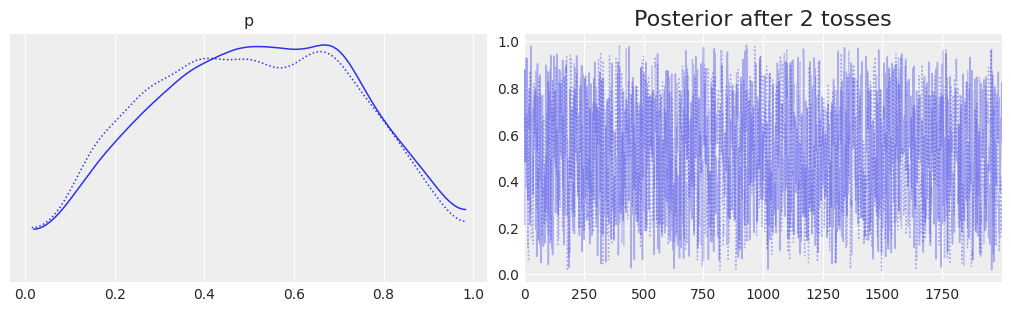

Coin bayesian model for 8 tosses


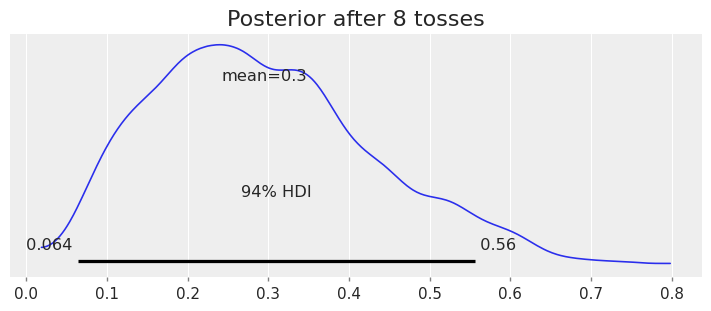

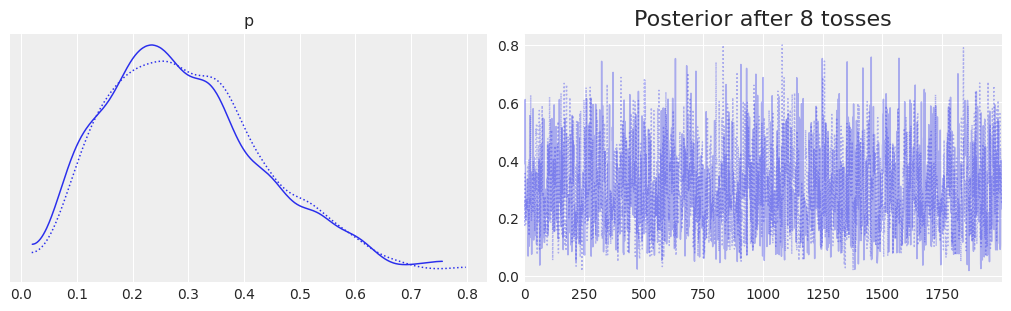

Coin bayesian model for 1000 tosses


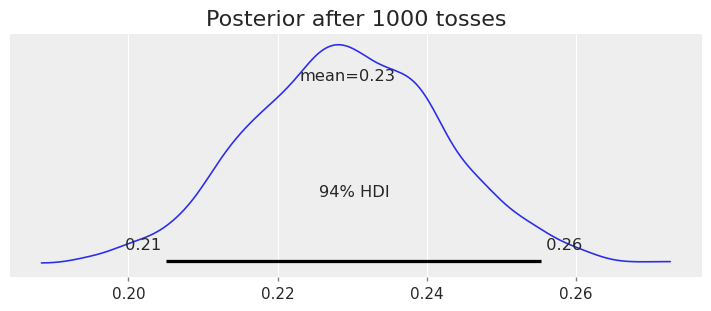

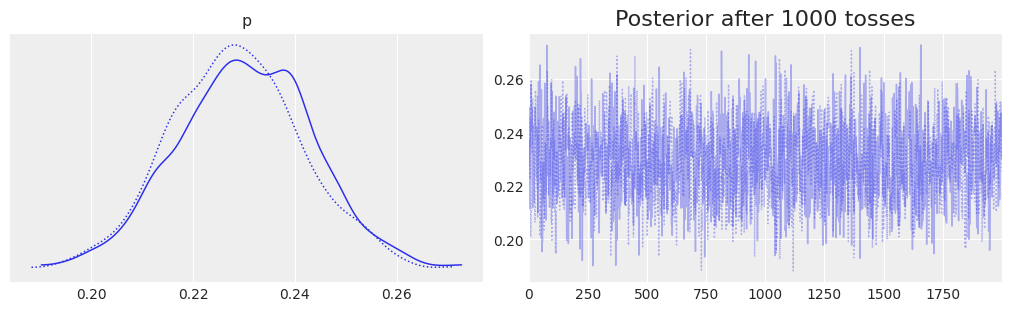

Coin bayesian model for 5000 tosses


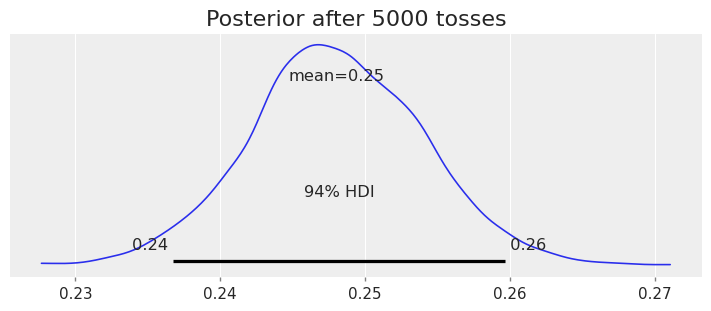

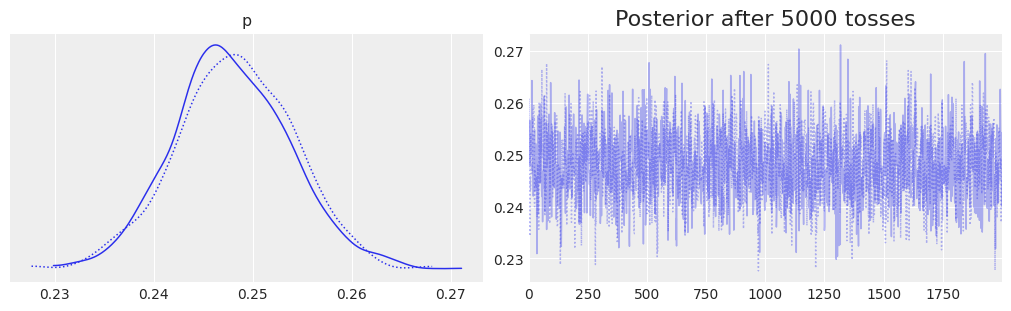

In [11]:
tosses = {
    0: [0, 1],
    1: [0, 1, 0, 0, 0, 0, 1, 0],
    2: np.random.binomial(n=1, p=0.25, size=[1000]),
    3: np.random.binomial(n=1, p=0.25, size=[5000])
}

for _, toss_data in tosses.items():

    print(f"Coin bayesian model for {len(toss_data)} tosses")

    with pm.Model() as model_ex2:
        # prior
        p = pm.Uniform('p', lower=0, upper=1)

        #likelihood
        # toss = pm.Bernoulli('toss', p=p, observed=toss_data) # can we also use this?
        heads = pm.Binomial('heads', n=len(toss_data), p=p, observed=sum(toss_data))

        # bayesian inference engine that samples from posterior
        step = pm.NUTS()
        trace = pm.sample(2000, step=step, chains=2, progressbar=False)


    az.plot_posterior(trace, var_names=['p'], figsize=(7, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()

    az.plot_trace(trace, var_names=['p'], figsize=(10, 3))
    plt.title(f"Posterior after {len(toss_data)} tosses")
    plt.show()
    plt.close()


# Exercise 1 - Find the bias of the coin

❗ Remember from the previous lab that since Beta(1,1) looks like Uniform(0,1), then we can use it as prior distribution.

$p \sim Beta(1, 1)$

$heads \sim Binomial(n, p)$

Upload the file *coin_tosses.npy* in the notebook, follow the examples above to make your own beta-binomial model, and name it my_betabin. Plot the posterior using arviz or matplotlib.

*Extra: PyMC also has a built-in BetaBinomial distribution. Read the documentation and check to see similar results to your own my_betabin model*

In [35]:
tosses.shape

(5000,)

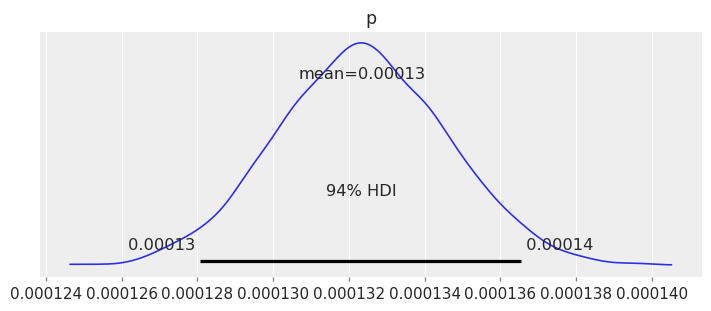

In [41]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

# TODO 1: Load coin_tosses.npy into a NumPy array
tosses = np.load('/content/coin_tosses.npy')

# TODO 2: Create the PyMC model following the examples above
with pm.Model() as my_betabin:
  p = pm.Beta(name='p', alpha=1, beta = 1)

  heads = pm.Binomial(name='binomial', n = len(tosses), p=p, observed=tosses)

  step = pm.NUTS()
  trace = pm.sample(2000, step=step, chains=2, progressbar=False)

az.plot_posterior(trace, figsize=(7, 3))
plt.show()
plt.close()

# Exercise 2 - A/B Testing

Write a (complete) PyMC program to solve the following problem:
We have two website designs, called A and B. When a user lands on our website, we randomly show them design A or B, and record this assignment. After enough visitors have done this, we join this dataset against some metric of interest (typically, for websites, we are interested in a purchase or signup, call it conversion). For example, consider the following numbers:



```
visitors_to_A = 262
visitors_to_B = 127
conversions_from_A = 20
conversions_from_B = 13
```



What we are really interested in is the probability of conversion, given site A or B. As a business, we want this probability to be as high as possible. So, our goal is to determine which site, A or B, has a higher probability of conversion.

Output()

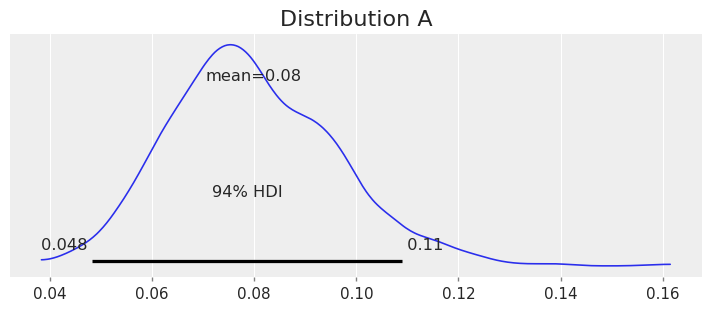

Output()

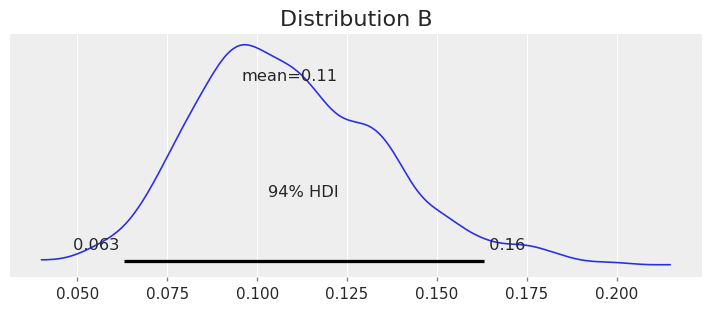

In [55]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

# What variables can be used to model this problem?

# You can measure the difference between the probabilities
# with a deterministic variable

with pm.Model() as model_A:
  p = pm.Uniform(name='p', lower=0, upper=1)

  conversion = pm.Binomial(name='binomial', n=262, p=p, observed=20)

  step = pm.NUTS()
  trace_A = pm.sample(1000, step=step, chains=2)

az.plot_posterior(trace_A, figsize=(7, 3))
plt.title("Distribution A")
plt.show()
plt.close()

with pm.Model() as model_B:
  p = pm.Uniform(name='p', lower=0, upper=1)

  conversion = pm.Binomial(name='binomial', n=127, p=p, observed=13)

  step = pm.NUTS()
  trace_B = pm.sample(1000, step=step, chains=2)

az.plot_posterior(trace_B, figsize=(7, 3))
plt.title("Distribution B")
plt.show()
plt.close()

# Exercise 3 - Heights

In the array heights.npy you will find a dataset of recorded heights in cm. Plot a histogram of the heights and decide on the best distribution to model them. Write a PyMC program to model the heights, plot the posterior distribution, and estimate the posterior distribution of the population mean height.

Output()

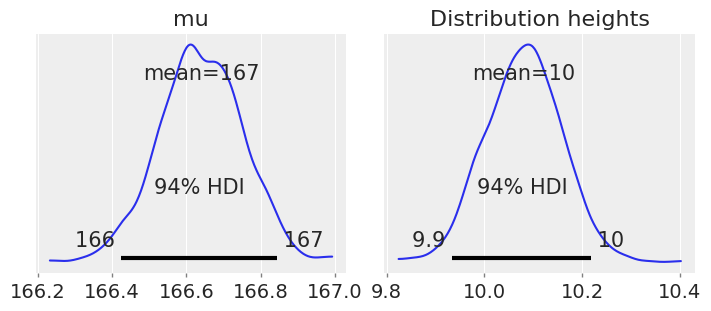

In [81]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
az.style.use("arviz-darkgrid")

heights = np.load('/content/heights.npy')

with pm.Model() as height_model:
  mu = pm.Uniform(name='mu', lower=0, upper=200)
  std = pm.Uniform(name='std', lower=0, upper=100)

  heights_dist = pm.Normal(name='heights', mu=mu, sigma=std, observed=heights)

  step = pm.NUTS()
  trace = pm.sample(1000, step=step)

az.plot_posterior(trace, figsize=(7, 3))
plt.title("Distribution heights")
plt.show()
plt.close()

# TODO 3: Plot the posterior and report your findings
#...

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   2.,   1.,   4.,   7.,   4.,   9.,  19.,  11.,  19.,  30.,
         27.,  31.,  32.,  45.,  49.,  55.,  64.,  97.,  83., 109., 118.,
        103., 159., 164., 148., 174., 184., 166., 193., 199., 176., 208.,
        211., 206., 168., 224., 205., 242., 194., 203., 212., 172., 209.,
        180., 175., 181., 214., 159., 175., 179., 181., 152., 173., 157.,
        129., 137., 132., 118., 111., 117.,  95.,  73.,  89.,  58.,  64.,
         53.,  61.,  45.,  34.,  27.,  28.,  33.,  24.,  16.,  17.,  13.,
          9.,  10.,   7.,   3.,   4.,   2.,   7.,   1.,   0.,   1.,   3.,
          1.]),
 array([131.1  , 131.785, 132.47 , 133.155, 133.84 , 134.525, 135.21 ,
        135.895, 136.58 , 137.265, 137.95 , 138.635, 139.32 , 140.005,
        140.69 , 141.375, 142.06 , 142.745, 143.43 , 144.115, 144.8  ,
        145.485, 146.17 , 146.855, 147.54 , 148.225, 148.91 , 149.595,
        150.28 , 150.965, 151.65 ,

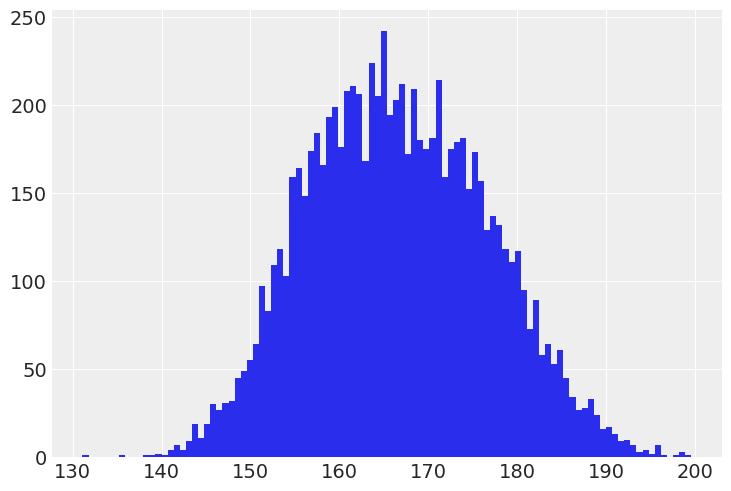

In [70]:
plt.hist(heights,bins=100)